In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# "RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility"
# errors are ok, per https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility

/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [80]:
file_prefix = '../data/362070167_T_ONTIME-'
#file_month_range = range(1,3)
file_month_range = range(1,13)

In [81]:
dtypes = {
    'CARRIER': 'category'
    ,'TAIL_NUM': 'category'
    ,'ORIGIN': 'category'
    ,'ORIGIN_CITY_NAME': 'category'
    ,'DEST': 'category'
    ,'DEST_CITY_NAME': 'category'
    ,'CANCELLATION_CODE': 'category'}

In [82]:
d_by_month = []
for month_index in file_month_range:
    d_by_month.append(pd.read_csv(f'{file_prefix}{month_index}.csv', dtype=dtypes))

In [83]:
for idx, d_month in enumerate(d_by_month):
    print(idx, d_month.shape)

0 (450017, 34)
1 (410517, 34)
2 (488597, 34)
3 (468329, 34)
4 (486483, 34)
5 (494266, 34)
6 (509070, 34)
7 (510451, 34)
8 (458727, 34)
9 (479797, 34)
10 (454162, 34)
11 (464205, 34)


In [84]:
d = pd.concat(d_by_month, ignore_index=True)
d.shape

(5674621, 34)

Even if we read the data individually as categories, we don't retain that type after the concat for every field (probably because the fields have different unique values). We can get back to the categorical type, and a smaller dataframe, by reapplying the type.

In [85]:
for field in dtypes:
    d[field] = d[field].astype(dtypes[field])

And we'll get a datetime too.

In [86]:
d['FL_DATE'] = pd.to_datetime(d['FL_DATE'])

In [87]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [88]:
mem_usage(d)

'1234.44 MB'

In [89]:
d.dtypes

FL_DATE                datetime64[ns]
CARRIER                      category
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                       category
ORIGIN_CITY_NAME             category
DEST                         category
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

In [90]:
d[:1]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,147.0,121.0,1.0,802.0,NaN,NaN,NaN,NaN,NaN,NaN


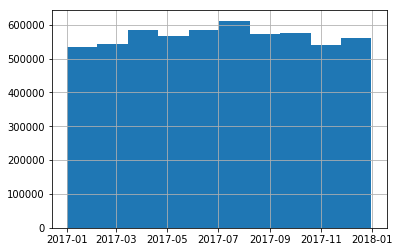

In [91]:
d['FL_DATE'].hist()